In [12]:
# Importing Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
company=pd.read_csv('Company_Data.csv')

In [3]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
company.shape

(400, 11)

In [6]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

### Data preprocessing

In [9]:
#Converting target variable in categorical variable
company["Sales"] = np.where(company['Sales']>8,'yes','no') 
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,yes,138,73,11,276,120,Bad,42,17,Yes,Yes
1,yes,111,48,16,260,83,Good,65,10,Yes,Yes
2,yes,113,35,10,269,80,Medium,59,12,Yes,Yes
3,no,117,100,4,466,97,Medium,55,14,Yes,Yes
4,no,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,yes,138,108,17,203,128,Good,33,14,Yes,Yes
396,no,139,23,3,37,120,Medium,55,11,No,Yes
397,no,162,26,12,368,159,Medium,40,18,Yes,Yes
398,no,100,79,7,284,95,Bad,50,12,Yes,Yes


In [10]:
#One Hot Encoding for categorical data
company1=pd.get_dummies(company,columns=['ShelveLoc'])
company1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,yes,138,73,11,276,120,42,17,Yes,Yes,True,False,False
1,yes,111,48,16,260,83,65,10,Yes,Yes,False,True,False
2,yes,113,35,10,269,80,59,12,Yes,Yes,False,False,True
3,no,117,100,4,466,97,55,14,Yes,Yes,False,False,True
4,no,141,64,3,340,128,38,13,Yes,No,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,yes,138,108,17,203,128,33,14,Yes,Yes,False,True,False
396,no,139,23,3,37,120,55,11,No,Yes,False,False,True
397,no,162,26,12,368,159,40,18,Yes,Yes,False,False,True
398,no,100,79,7,284,95,50,12,Yes,Yes,True,False,False


In [13]:
company1.Sales.replace(('yes','no'),(1, 0),inplace=True)
company1.Urban.replace(('Yes','No'),(1, 0),inplace=True)
company1.US.replace(('Yes','No'),(1, 0),inplace=True)
company1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,1,138,73,11,276,120,42,17,1,1,True,False,False
1,1,111,48,16,260,83,65,10,1,1,False,True,False
2,1,113,35,10,269,80,59,12,1,1,False,False,True
3,0,117,100,4,466,97,55,14,1,1,False,False,True
4,0,141,64,3,340,128,38,13,1,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,33,14,1,1,False,True,False
396,0,139,23,3,37,120,55,11,0,1,False,False,True
397,0,162,26,12,368,159,40,18,1,1,False,False,True
398,0,100,79,7,284,95,50,12,1,1,True,False,False


In [14]:
company1.dtypes

Sales               int64
CompPrice           int64
Income              int64
Advertising         int64
Population          int64
Price               int64
Age                 int64
Education           int64
Urban               int64
US                  int64
ShelveLoc_Bad        bool
ShelveLoc_Good       bool
ShelveLoc_Medium     bool
dtype: object

### Model Building

In [15]:
X=pd.concat([company1.iloc[:,1:]])
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,138,73,11,276,120,42,17,1,1,True,False,False
1,111,48,16,260,83,65,10,1,1,False,True,False
2,113,35,10,269,80,59,12,1,1,False,False,True
3,117,100,4,466,97,55,14,1,1,False,False,True
4,141,64,3,340,128,38,13,1,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,1,False,True,False
396,139,23,3,37,120,55,11,0,1,False,False,True
397,162,26,12,368,159,40,18,1,1,False,False,True
398,100,79,7,284,95,50,12,1,1,True,False,False


In [16]:
Y=company1.iloc[:,0]
Y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: int64

In [18]:
# Splitting data into training and testing data set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(320, 12)
(80, 12)
(320,)
(80,)


### Model Training

In [20]:
#Random forest
#n_estimators:This is the no.of trees you want to build before taking the maximum voting or averages of predictions
rf_model=RandomForestClassifier(n_estimators=70,criterion='entropy',max_depth=5)

In [21]:
rf_model.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=70)

### Model Testing

In [22]:
Y_train_pred=rf_model.predict(X_train)
Y_train_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,

In [23]:
Y_test_pred=rf_model.predict(X_test)
Y_test_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

### Model Evaluation

In [25]:
print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       193
           1       1.00      0.83      0.91       127

    accuracy                           0.93       320
   macro avg       0.95      0.91      0.93       320
weighted avg       0.94      0.93      0.93       320



In [26]:
print(confusion_matrix(Y_train,Y_train_pred))

[[193   0]
 [ 22 105]]


0.9133858267716535


Text(0, 0.5, 'True Positive Rate')

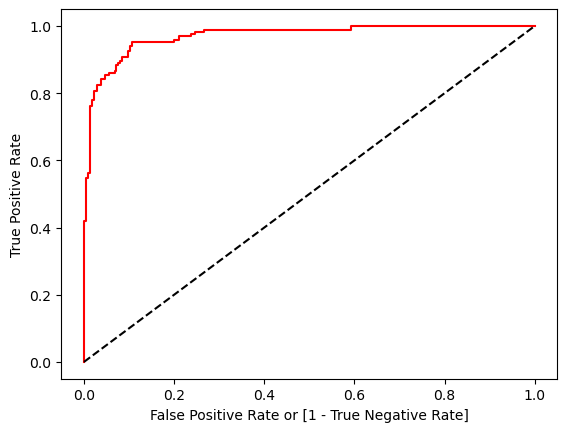

In [27]:
fpr, tpr, thresholds = roc_curve(Y,rf_model.predict_proba (X)[:,1])
auc = roc_auc_score(Y_train,Y_train_pred)
print(auc)
plt.plot(fpr, tpr, color='red', label='rf model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [28]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        43
           1       0.84      0.70      0.76        37

    accuracy                           0.80        80
   macro avg       0.81      0.79      0.80        80
weighted avg       0.80      0.80      0.80        80



In [29]:
print(confusion_matrix(Y_test,Y_test_pred))

[[38  5]
 [11 26]]


0.7932118164676304


Text(0, 0.5, 'True Positive Rate')

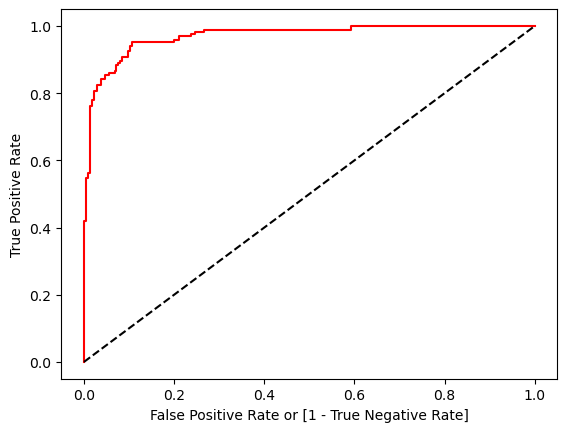

In [30]:
fpr, tpr, thresholds = roc_curve(Y,rf_model.predict_proba (X)[:,1])
auc = roc_auc_score(Y_test,Y_test_pred)
print(auc)
plt.plot(fpr, tpr, color='red', label='rf model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [31]:
#Training accuracy- 91%
#Testing accuracy- 79%

### Hyperparameter Tuning with GridSearchCV

In [33]:
grid_model = GridSearchCV(estimator = rf_model,param_grid = {'n_estimators' : [20,50,70,100],
                                                            'criterion' :['gini','entropy'],
                                                             'max_depth' :[2,3,5]})
grid_model.fit(X_train,Y_train)
print(grid_model.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}
